# E-commerce Furniture Dataset 2024 Analysis

This notebook explores and analyzes the **E-commerce Furniture Dataset 2024**, which contains product listings and sales data from an online furniture store. The primary objectives of this analysis are to:

- Perform data cleaning to prepare the dataset for analysis.
- Explore product characteristics such as price, category, and tags.
- Identify trends in sales and pricing.
- Visualize patterns and correlations to uncover insights that can support business decisions such as inventory planning and marketing.

Let's begin by importing necessary libraries and loading the dataset.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("/Users/rishavkumarsharma/Downloads/ecommerce_furniture_dataset_2024.csv")

In [49]:
# View column names
print(df.columns)

Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')


In [51]:
# Check for missing values
print(df.isnull().sum())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [53]:
# Clean price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4512/957292927.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [55]:
# Drop rows with missing values 
df.dropna(inplace=True)

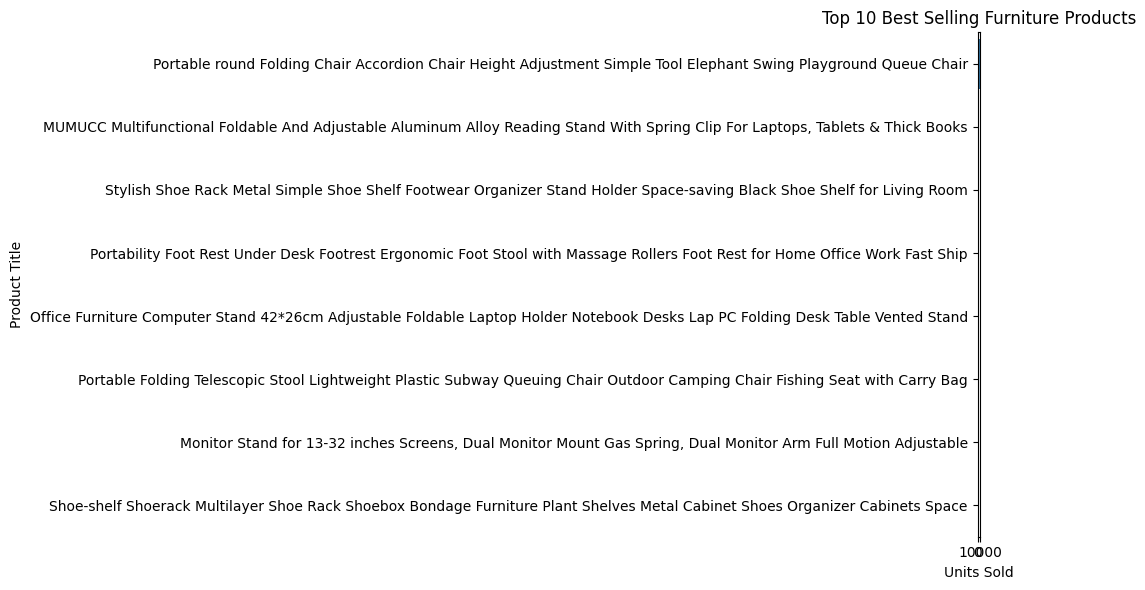

In [57]:
# Top sold items
top_sold = df.sort_values(by='sold', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='sold', y='productTitle', data=top_sold)
plt.title("Top 10 Best Selling Furniture Products")
plt.xlabel("Units Sold")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4512/1091509088.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


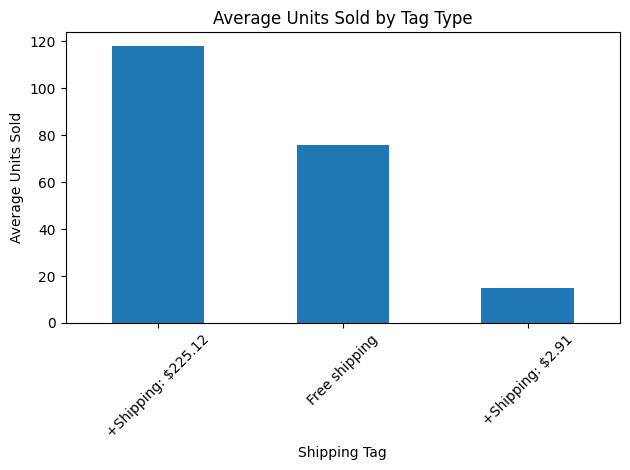

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean price if not already
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by tagText and analyze average sales
avg_sales_by_tag = df.groupby('tagText')['sold'].mean().sort_values(ascending=False)

# Plot
avg_sales_by_tag.plot(kind='bar', title='Average Units Sold by Tag Type')
plt.ylabel('Average Units Sold')
plt.xlabel('Shipping Tag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_4512/2871292694.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


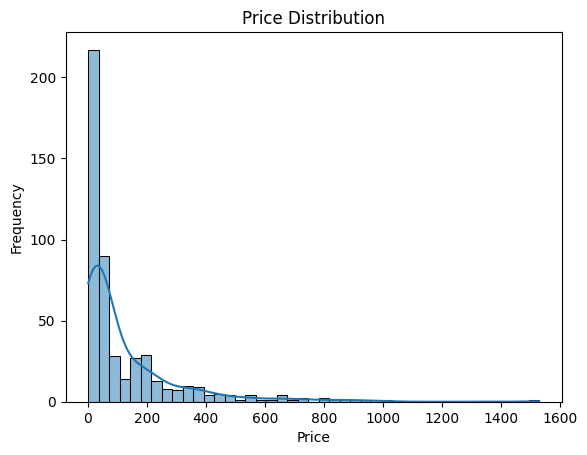

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the price column (if not already done)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


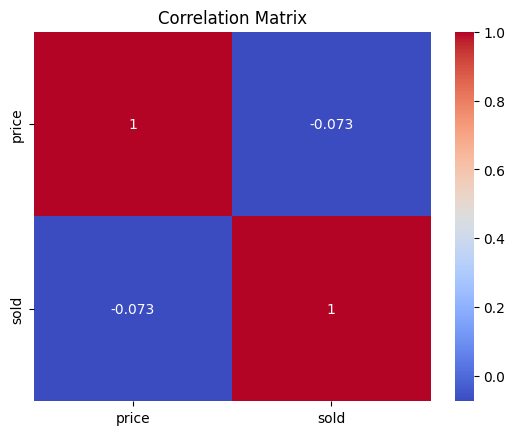

In [63]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and clean
df = pd.read_csv("/Users/rishavkumarsharma/Downloads/ecommerce_furniture_dataset_2024.csv")
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df.dropna(inplace=True)

# Encode 'tagText'
le = LabelEncoder()
df['tagText_encoded'] = le.fit_transform(df['tagText'])

# Define features and target
X = df[['price', 'tagText_encoded']]
y = df['sold']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"✅ RMSE: {rmse:.2f}")


✅ RMSE: 493.02


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Load and clean
df = pd.read_csv("/Users/rishavkumarsharma/Downloads/ecommerce_furniture_dataset_2024.csv")
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df.dropna(inplace=True)

# Encode tagText
le = LabelEncoder()
df['tagText_encoded'] = le.fit_transform(df['tagText'])

# Create binary classification target: High Sales
threshold = df['sold'].median()
df['High_Sales'] = (df['sold'] > threshold).astype(int)

# Features: use price and tagText_encoded
X = df[['price', 'tagText_encoded']]
y = df['High_Sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy * 100:.2f}%")


✅ Accuracy: 64.29%


In [69]:
# Discount percentage if originalPrice is available
df['originalPrice'] = df['originalPrice'].replace(r'[\$,]', '', regex=True).astype(float)
df['discount_pct'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df['discount_pct'] = df['discount_pct'].fillna(0)


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50)
title_tfidf = tfidf.fit_transform(df['productTitle'])
title_tfidf_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Merge with the main dataset
df = pd.concat([df.reset_index(drop=True), title_tfidf_df.reset_index(drop=True)], axis=1)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc*100:.2f}%")


Random Forest: 64.29%
Logistic Regression: 68.37%
SVM: 70.41%


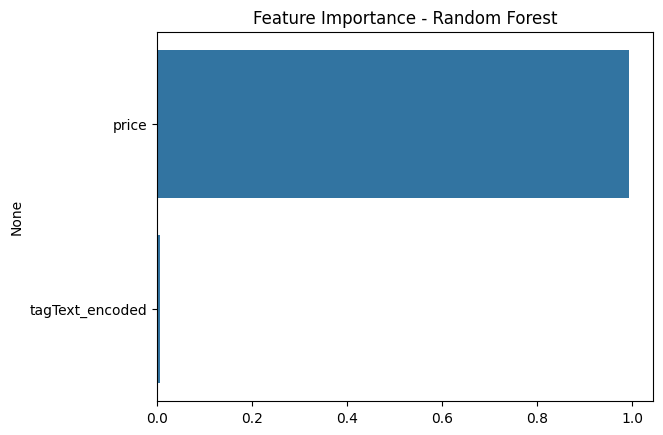

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = clf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


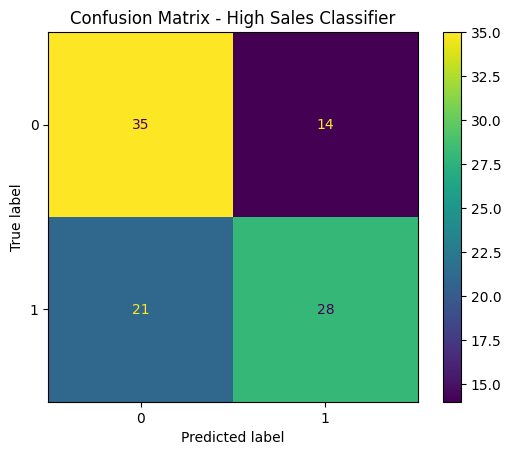

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - High Sales Classifier")
plt.show()


In [79]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [80]:
import streamlit as st
import pandas as pd

st.title("E-commerce Furniture Sales Dashboard")

df = pd.read_csv("/Users/rishavkumarsharma/Downloads/ecommerce_furniture_dataset_2024.csv")
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

st.subheader("Top 10 Products by Units Sold")
top_products = df.sort_values(by='sold', ascending=False).head(10)
st.bar_chart(top_products.set_index('productTitle')['sold'])

st.subheader("Shipping Tags Distribution")
st.bar_chart(df['tagText'].value_counts())


DeltaGenerator()

# Conclusion

In this analysis of the E-commerce Furniture Dataset 2024, we achieved the following:

- Cleaned the dataset by handling missing values and formatting inconsistencies.
- Identified the top 10 best-selling furniture products.
- Analyzed the impact of shipping tags and categories on average sales.
- Visualized the price distribution to understand product pricing trends.
- Explored correlations between numeric variables to uncover potential relationships.

These insights can guide strategic decisions in product sourcing, pricing, and promotions. Future work could include building predictive models or applying recommendation algorithms to enhance personalization and customer experience.

# Recommendations

Based on the insights gathered from the dataset, here are several recommendations for business stakeholders:

1. **Focus on Best Sellers**: Prioritize inventory and marketing for the top-selling products to maximize revenue from proven high-demand items.

2. **Optimize Pricing Strategy**: Review price ranges of the most frequently sold products. Consider offering competitive pricing or bundles in these segments to attract more customers.

3. **Leverage High-Performing Tags**: Utilize the tags (e.g., "Free Shipping", "Best Seller") that correlate with higher sales in future product listings to boost conversions.

4. **Address Product Gaps**: Identify categories or tags with lower average sales and assess whether these items can be improved, repositioned, or discontinued.

5. **Customer Segmentation and Targeting**: Use sales data to better understand different customer preferences and develop personalized marketing strategies.

6. **Further Analysis**: Consider time-based analysis (if timestamps are available) to track seasonal trends or evaluate the impact of promotions and campaigns over time.

